#  **Microsoft Movie Studio - Technical Summary**
Authors: Stu Murphy and Nicole Bills

Date: 10/23/19

Data source: The Numbers (Movie budgets and worldwide gross) & IMDB (genres)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from functions import *

In [2]:
# import raw data files
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
df_basics = pd.read_csv('data/imdb.title.basics.csv.gz')

# Report - Opportunity Analysis

Goal:  develop a strategy for Microsoft to create a successful movie studio based on return on investment (ROI)

Results:    Microsoft should focus its efforts on Animation, Sci-Fi and Adventure (high return, low risk), and consider investing in Mystery and Horror (high return, high risk).  The studio should avoid producing films in the Bigraphy, Drama, and Crime categories.

### Assumptions
Return on investment (ROI) is the best metric for Microsoft to assess to evaluate the success of the new venture. We have chosen to define ROI based on net revenue for the following reasons:
1.	**Valuation**: given that Microsoft is a publicly traded company, the company’s valuation is based off of quarterly earnings (earnings per share) and not profit margin. We also recognize that Microsoft wants their new movie studio to be profitable, therefore using total sales or gross revenue would be meaningless.
2.   **Context**: We do not want to assume that Microsoft will be as immediately as profitable as their competitors, when entering a new market. We should assume the company will incur higher production and operational costs due to initial capex and operational inefficiencies.
3.   **Perception**: Important at an early stage. Headlines with large box office earnings (not profits) are advantageous when establishing a venture in a new vertical around strong competition.

### Methodology
1.	Feature Selection
    -	Identifying net revenue ROI as our target variable and selecting Genre as our subject for exploration
2.	Data Cleaning
    -	Transformation of str to int
    -	Drop outliers
3.	Feature Engineering
    -	New feature creation (ROI)
    -	Sort values
    -	Reset index
    -	Merge datasets
    -	Drop missing values
4.	Exploratory Analysis & Visualization
    -	Central tendency
    -	Distribution plots
    -	Quintile comparisons

### Data Preparation

### Analysis

In [3]:
df_fulldata = pd.read_csv('movie_data2.csv')

#### What genres groupings are associated with the highest median ROI?

In [4]:
sort=True

In [5]:
# Set up a table with median revenue by genre grouping, where count of movies in each genre grouping >= 10
table1 = pd.pivot_table(df_fulldata, index=['genres'], values ='worldwide_roi', aggfunc=['mean','median','std','count'])
table1 = pd.DataFrame(table1)
table1.columns = table1.columns.to_series().str.join('_')
table1 = pd.DataFrame(table1.sort_values('median_worldwide_roi', ascending=False))
table1 = pd.DataFrame(table1.loc[table1['count_worldwide_roi']>9].reset_index())
table1.columns = ['genre_groupings', 'mean_worldwide_roi', 'median_worldwide_roi',
       'std_worldwide_roi', 'count_worldwide_roi']
table1[['genre_groupings','median_worldwide_roi','std_worldwide_roi','count_worldwide_roi']].head()


,genre_groupings,median_worldwide_roi,std_worldwide_roi,count_worldwide_roi
0,"Horror,Mystery,Thriller",1271.051550,7332.772539,31
1,"Drama,Horror,Mystery",450.073388,882.699736,13
2,"Action,Adventure,Animation",395.228987,171.909120,15
3,"Action,Adventure,Comedy",376.935680,325.323322,22
4,"Action,Sci-Fi,Thriller",364.960432,378.791540,10


In [47]:
# Create a pivot table by ROI category and Genre, and add additional ROI classifications to enable sort
piv1 = pd.pivot_table(df_fulldata, index=['roi_category','genres'], values ='id', aggfunc='count')
piv1 = piv1.reset_index()
piv1.columns = ['roi_category', 'genres', 'count']
piv1['roi_category2'] = piv1['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':'other', 'moderate':'other', 'somewhat low':'other', 'low':'other'}[x])
piv1['roi_category3'] = piv1['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':np.nan, 'moderate':np.nan, 'somewhat low':np.nan, 'low':'low'}[x])


In [51]:
# Create a table to visualize with seaborn
viz0 = piv1.loc[(piv1.genres == 'Horror,Mystery,Thriller') \
         | (piv1.genres == 'Drama,Horror,Mystery') \
         | (piv1.genres == 'Action,Adventure,Animation')]
viz0.sort_values(by=['genres'], ascending=False, inplace=True)


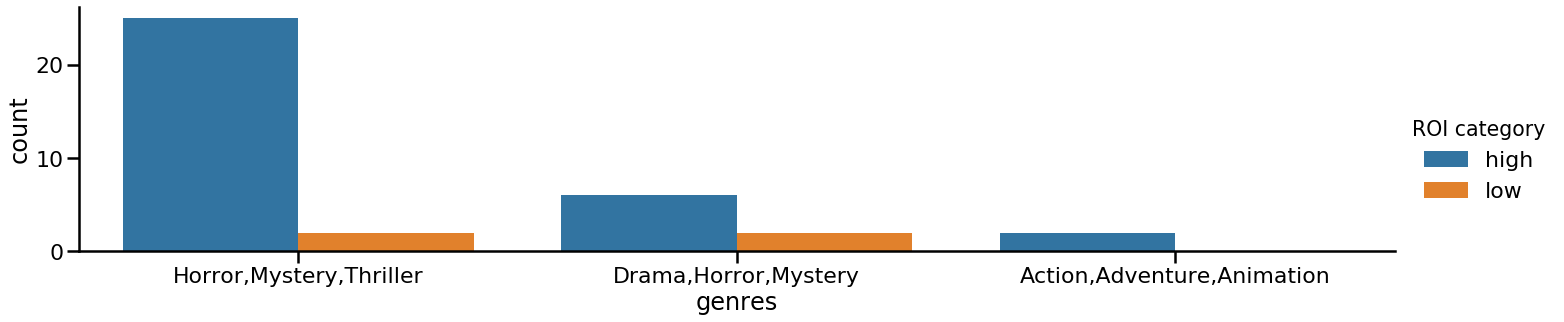

In [52]:
# Visualize data with Seaborn
sns.set_context('poster');
viz1 = sns.catplot(x='genres', y='count', hue='roi_category3', data=viz0, kind='bar', aspect=4, legend_out = True);
viz1._legend.set_title('ROI category')


### What genres are associated with the highest median ROI?

In [122]:
# Create list of dummy columns associated with Genres
genreList = []
for el in df_fulldata['genres'].map(lambda x: str(x).split(",")):
    for el2 in el:
        genreList.append(el2)
genreCols = list(set(genreList))

In [13]:
# Create series sumarizing genre data
meanROIs = {}
for col in genreCols:
    meanROIs[col] = (df_fulldata.loc[df_fulldata[col] == 1])['worldwide_roi'].mean()
table1 = pd.DataFrame(pd.Series(meanROIs))
table1.columns = ['mean_roi']

medianROIs = {}
for col in genreCols:
    medianROIs[col] = (df_fulldata.loc[df_fulldata[col] == 1])['worldwide_roi'].median()
table2 = pd.DataFrame(pd.Series(medianROIs))
table2.columns = ['median_roi']

stdROIs = {}
for col in genreCols:
    stdROIs[col] = (df_fulldata.loc[df_fulldata[col] == 1])['worldwide_roi'].std()
table3 = pd.DataFrame(pd.Series(stdROIs))
pd.DataFrame(table3.reset_index(inplace=True))
table3.columns = ['genres','stdev']

countROIs = {}
for col in genreCols:
    countROIs[col] = df_fulldata[col].sum()
table4 = pd.DataFrame(pd.Series(countROIs))
pd.DataFrame(table4.reset_index(inplace=True))
table4.columns = ['genres','count']


In [14]:
# Create a merged table
table5 = table1.merge(table2, left_index=True, right_index=True)
table5.sort_values('median_roi', inplace=True, ascending=False)
table5.reset_index(inplace=True)
table5.columns = ['genres','mean_roi','median_roi']
table5 = table5.merge(table3, on='genres')
table5 = table5.merge(table4, on='genres')
table5.head()


,genres,mean_roi,median_roi,stdev,count
0,Mystery,969.924839,323.341050,3772.410542,126
1,Animation,367.441904,299.456497,286.741717,101
2,Sci-Fi,360.843431,267.273519,333.504156,134
3,Adventure,308.431154,263.067059,241.723199,350
4,Horror,881.836592,242.936084,3260.059609,184


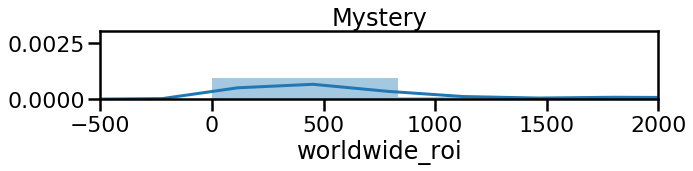

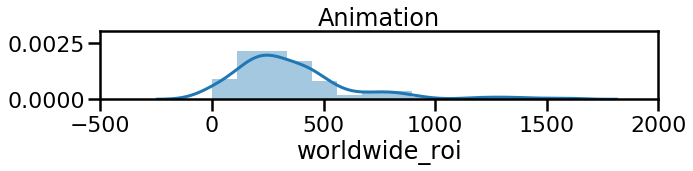

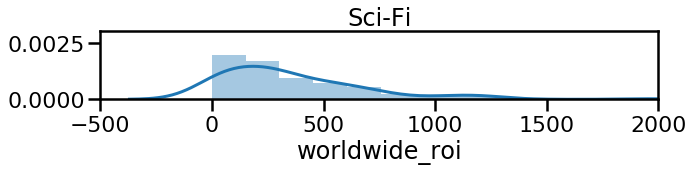

In [87]:
# Create distplot visualization to display distribution (median) and risk (standard deviation)
viz2aa = df_fulldata.loc[df_fulldata['Mystery'] == 1];
plt.figure(figsize=(10,1.25));
viz2a = sns.distplot(viz2aa['worldwide_roi']);
viz2a.set(title='Mystery');
viz2a.set(ylim=(0,.003));
viz2a.set(xlim=(-500,2000));

viz2bb = df_fulldata.loc[df_fulldata['Animation'] == 1];
plt.figure(figsize=(10,1.25));
viz2b = sns.distplot(viz2bb['worldwide_roi']);
viz2b.set(title='Animation');
viz2b.set(ylim=(0,.003));
viz2b.set(xlim=(-500,2000));

viz2cc = df_fulldata.loc[df_fulldata['Sci-Fi'] == 1];
plt.figure(figsize=(10,1.25));
viz2c = sns.distplot(viz2cc['worldwide_roi']);
viz2c.set(title='Sci-Fi');
viz2c.set(ylim=(0,.003));
viz2c.set(xlim=(-500,2000));

### What genres should be avoided due to association with the lowest median ROIs?

In [93]:
table5.loc[table5['count'] > 100].tail(3)

,genres,mean_roi,median_roi,stdev,count
12,Biography,338.162073,186.987333,442.768858,135
14,Drama,315.406720,176.019900,462.449961,734
16,Crime,215.907137,163.040095,222.134389,233


In [119]:
# Set up table for visualization
piv3 = pd.DataFrame((pd.pivot_table(df_fulldata, index=['roi_category'], values=df_fulldata[[el for el in genreCols]], aggfunc='sum')).stack())
piv3.reset_index(inplace=True)
piv3.columns = ['roi_category', 'genres', 'count']
piv3['roi_category2'] = piv3['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':'other', 'moderate':'other', 'somewhat low':'other', 'low':'other'}[x])
piv3['roi_category3'] = piv3['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':np.nan, 'moderate':np.nan, 'somewhat low':np.nan, 'low':'low'}[x])

viz3 = piv3.loc[(piv3.genres == 'Biography') \
         | (piv3.genres == 'Drama') \
         | (piv3.genres == 'Crime')]
viz3['genreSort'] = viz3['genres'].apply(lambda x: {'Biography':12, 'Drama':14, 'Crime':16}[x])
viz3.sort_values(['genreSort'], inplace=True)

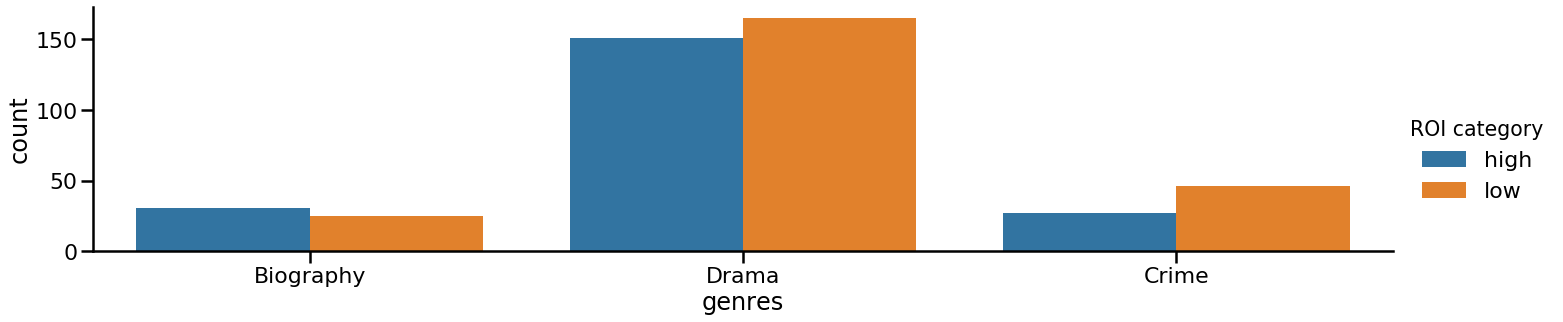

In [121]:
# Visualize low performing genres in bar chart
viz3a = sns.catplot(x='genres', y='count', hue='roi_category3', data=viz3, kind='bar', aspect=4);
viz3a._legend.set_title('ROI category')


### Recommendations
1.	Client should target **high-return, low-risk** genres such as **Animation, Sci-Fi and Adventure**.  In the past, the combination of Action/Adventure/Animation has yielded high-return films.
2.	Client should seek concepts/titles than have **significant potential** for serialization within high ROI genres (potentially look to comics or multi-novel series).
3.	Client should **carefully evaluate** projects in the **Mystery and Horror** genres.  Historical data indicates that Horror/Mystery/Thrillers and Drama/Horror/ Mystery represent high risk, high reward opportunities.
4.	Client **should avoid Biography, Drama, and Crime** genres, given their relatively low ROI.


### Areas for Further Analysis
 - Within target genres, are there key players (i.e. director, producer, screenwriters) to involve in production?